<a href="https://colab.research.google.com/github/pandi000/MachineLearning/blob/main/Minggu3bab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pandas import DataFrame
import pandas as pd
import numpy as np

baca data csv

In [5]:
df = pd.read_csv("Kredit_ku.csv")
print(df)
df.info()

     Durasi Riwayat_kredit Tujuan  ...  Pekerjaan Jum_tanggungan creditScore
0         6            A34    A43  ...       A173              1           1
1        48            A32    A43  ...       A173              1           2
2        12            A34    A46  ...       A172              2           1
3        42            A32    A42  ...       A173              2           1
4        24            A33    A40  ...       A173              2           2
..      ...            ...    ...  ...        ...            ...         ...
144      21            A34    A42  ...       A173              1           1
145      48            A31    A49  ...       A173              1           1
146       6            A34    A40  ...       A173              1           1
147      12            A34    A40  ...       A173              1           1
148      36            A34    A42  ...       A173              1           1

[149 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14

lalu kita cek missing valuenya

In [6]:
creditScore_index = ['creditScore']
creditScore_df = df [['creditScore']]
creditScore_df.info()

creditScore_df.isnull().values.any()
creditScore_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   creditScore  149 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


creditScore    0
dtype: int64

lalu hitung komposisi data pada atribut dependent creditScore

In [7]:
df.creditScore.value_counts()

1    112
2     37
Name: creditScore, dtype: int64

untuk mengetahui informasi dan ukuran atribut independen

In [48]:
df_attribute = df.drop(creditScore_df, axis = 1)
df_attribute.shape

(146, 8)

lalu kita lihat adakah missing value, bisa dilihat kalau data dibawah sudah tidak memiliki missing value

In [9]:
df_attribute.isnull().values.any()
df_attribute.isnull().sum()

Durasi            0
Riwayat_kredit    0
Tujuan            0
Jum_kredit        0
Savings           0
Masa_kerja        0
Pekerjaan         0
Jum_tanggungan    0
dtype: int64

mengetahui atribut yang bertipe object kategori seperti pada gambar dibawah ada 5 data

In [10]:
kategori_df = df.select_dtypes(include=['object'])
kategori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Riwayat_kredit  149 non-null    object
 1   Tujuan          149 non-null    object
 2   Savings         149 non-null    object
 3   Masa_kerja      149 non-null    object
 4   Pekerjaan       149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


untuk mengetahui atribut yang bertipe numerik bisa menggunakan perintah dibawah ini ada 4 data

In [11]:
numerik_df = df.select_dtypes(include=['int64'])
numerik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Durasi          149 non-null    int64
 1   Jum_kredit      149 non-null    int64
 2   Jum_tanggungan  149 non-null    int64
 3   creditScore     149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [12]:
numerik_index = numerik_df.columns
numerik_index

Index(['Durasi', 'Jum_kredit', 'Jum_tanggungan', 'creditScore'], dtype='object')

kemudian cara untuk menampilkan histogram bisa menggunakan perintah dibawah ini

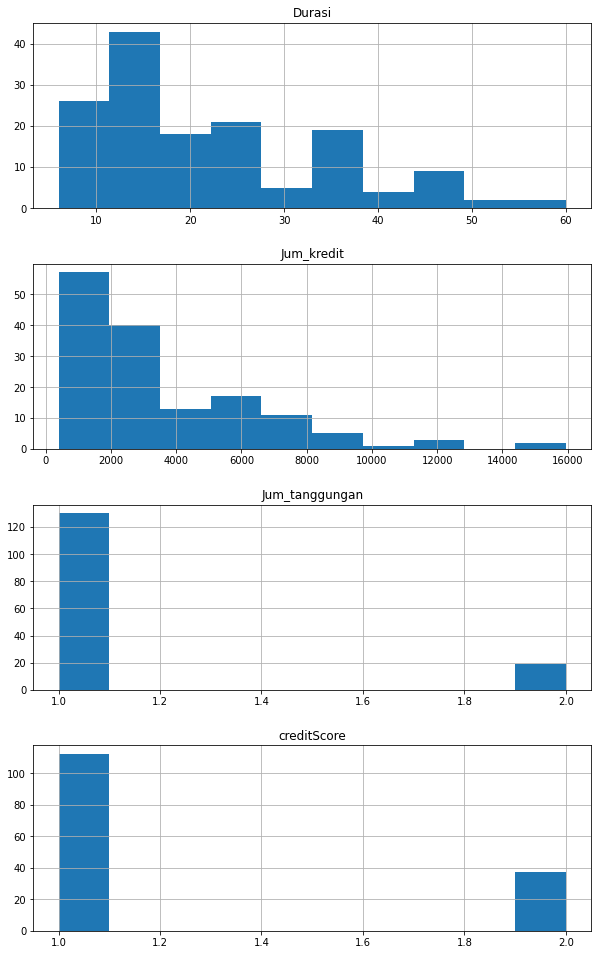

In [13]:
import matplotlib
import matplotlib.pyplot as plt
df.hist(column=numerik_index, figsize=(10,30), layout=(7,1))
plt.show()

lalu untuk menampilkan dalam bentuk boxplot bisa menggunakan perintah dibawah ini

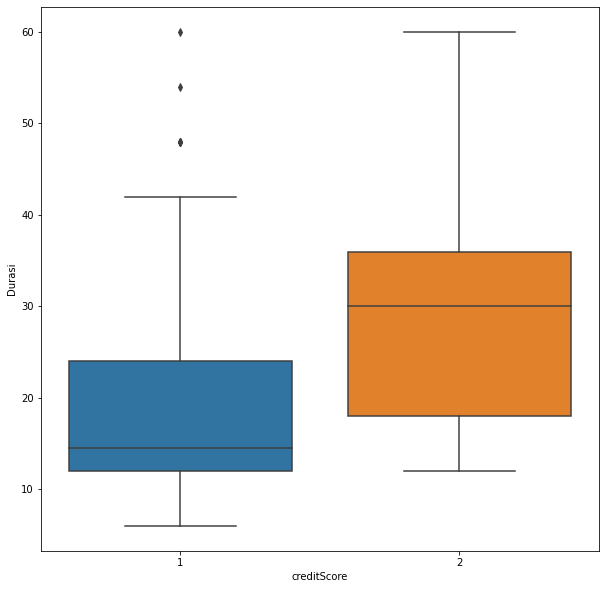

In [15]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
sns.boxplot(x="creditScore", y="Durasi", data=df)
plt.show()

lalu kita tampilkan durasi berdasarkan kelas creditScore nya bisa menggunakan perintah dibawah ini

In [16]:
df[['creditScore', 'Durasi',]].groupby(['creditScore'], as_index=False).mean().sort_values(by='Durasi', ascending=False)

,creditScore,Durasi
1,2,29.918919
0,1,19.142857


lalu kita lakukan uji hipotesis atribut numerik independen vs atribut dependen

In [17]:
# Uji Hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Durasi"])) < 3)]

income_1 = df[df['creditScore']==1]['Durasi']
income_0 = df[df['creditScore']==2]['Durasi']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
  print("No Ditolak")
else:
  print("No Diterima")


ttest -1.7365633227478472
p value 0.09955861437944322
No Diterima


In [18]:
# Uji Hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Jum_kredit"])) < 3)]

income_1 = df[df['creditScore']==1]['Jum_kredit']
income_0 = df[df['creditScore']==2]['Jum_kredit']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
  print("No Ditolak")
else:
  print("No Diterima")

ttest -2.708133415789489
p value 0.015192741731917222
No Ditolak


In [19]:
# Uji Hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Jum_tanggungan"])) < 3)]

income_1 = df[df['creditScore']==1]['Jum_tanggungan']
income_0 = df[df['creditScore']==2]['Jum_tanggungan']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
  print("No Ditolak")
else:
  print("No Diterima")

ttest 0.0
p value 1.0
No Diterima


untuk melakukan uji hipotesis atribut kategori independen vs atribut dependen

In [46]:
def bar_chart(feature):
  Accepted = df[df['creditScore']==1][feature].value_counts()
  Rejected = df[df['creditScore']==2][feature].value_counts()
  df1 = pd.DataFrame([Accepted, Rejected])
  df1.index=['Accepted', 'Rejected']
  df1.plot(kind='bar',stacked=True,fig=(18,6),title=feature)



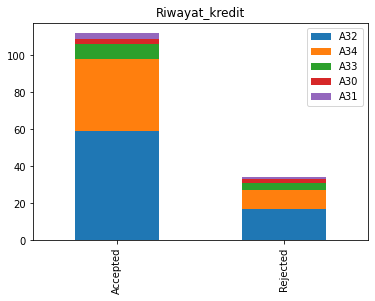

In [47]:
bar_chart('Riwayat_kredit')

lalu kita bisa menampilkan tabel kontingensi menggunakn perintah dibawah ini

In [32]:
c_t = pd.crosstab(df['Riwayat_kredit'], df['creditScore'], margins=False)
c_t

creditScore,1,2
Riwayat_kredit,,
A30,3,2
A31,3,1
A32,59,17
A33,8,4
A34,39,10


In [33]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.99
critical = chi2.ppf(prob, dof)
print('probabilitas=5=%.3f, critical=%.3f, stat=%3f' % (prob, critical, stat))
if abs(stat) >= critical:
  print('Dependent (Tolak H0)')
else:
  print('Independent (Terima H0)')

dof=4
p_value 0.7853458416600356
[[ 3.83561644  1.16438356]
 [ 3.06849315  0.93150685]
 [58.30136986 17.69863014]
 [ 9.20547945  2.79452055]
 [37.5890411  11.4109589 ]]
probabilitas=5=0.990, critical=13.277, stat=1.729535
Independent (Terima H0)


unutuk menampilkan Pearson correlation nya bisa menggunakan perintah dibawah ini

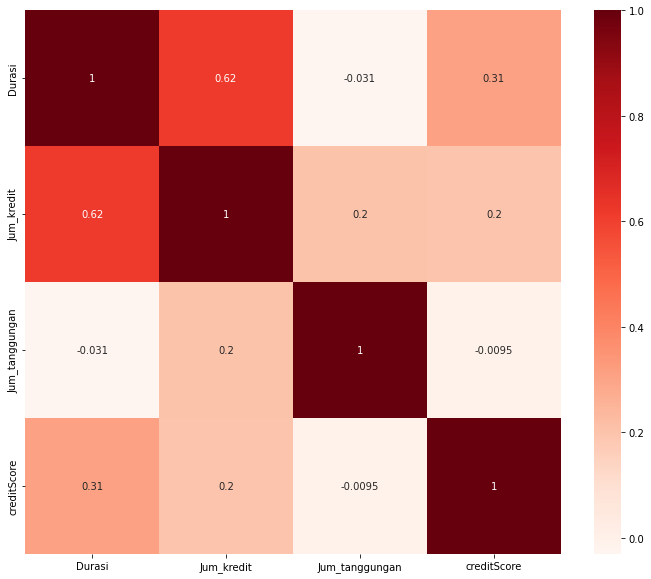

Durasi         0.308726
Jum_kredit     0.196635
creditScore    1.000000
Name: creditScore, dtype: float64

In [34]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["creditScore"])

relevant_features = cor_target[cor_target>0.1]
relevant_features